In [1]:
# LOAD VGG16

from keras.applications import VGG16
import pandas as pd
import numpy as np

print(VGG16.__doc__)

Using TensorFlow backend.


Instantiates the VGG16 architecture.

    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.

    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.

    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data for

In [4]:
model = VGG16()

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

def get_input(img_path):
    img = imread(img_path)
    plt.imshow(img)
    img = resize(img, (224, 224), preserve_range=True).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    return img

def get_predictions(img_path, decode=True):
    input_ = get_input(img_path)
    out = model.predict(input_)
    if decode:
        return decode_predictions(out)
    else:
        return out

/Users/robertomac/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[[('n03680355', 'Loafer', 0.43101212),
  ('n03047690', 'clog', 0.3960776),
  ('n03124043', 'cowboy_boot', 0.085207075),
  ('n04200800', 'shoe_shop', 0.039835483),
  ('n04133789', 'sandal', 0.019494284)]]

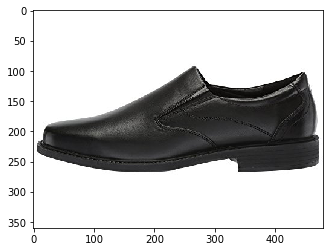

In [16]:
img_file = 'shoe1.jpg'
get_predictions(img_file)

In [17]:
preprocess_input?

In [60]:
#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=True)
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
from keras.models import Model

In [72]:
def image_process(img_file):
    img = imread(img_file)
#     plt.imshow(img)
    img = resize(img, (224, 224), preserve_range=True).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [135]:
# model2 = Model(input=model_vgg16_conv.input, output=model_vgg16_conv.get_layer('fc2').output)
model2 = Model(input=model_vgg16_conv.input, output=model_vgg16_conv.get_layer('block5_conv3').output)



/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  from ipykernel import kernelapp as app


In [136]:
im1 = image_process('shoe1.jpg')
out = model2.predict(im1)

/Users/robertomac/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


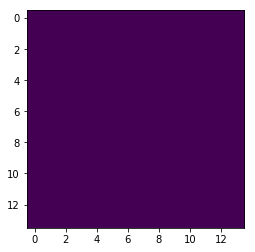

In [137]:
plt.imshow(out[0,:,:,0])

In [76]:
im1 = image_process('shoe1.jpg')
out = model2.predict(im1)
out1 = out[0]

im1 = image_process('shoe2.jpg')
out = model2.predict(im1)
out2 = out[0]

im1 = image_process('shoe3.jpg')
out = model2.predict(im1)
out3 = out[0]

/Users/robertomac/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [81]:
print(np.sum((out1-out2)**2))
print(np.sum((out1-out3)**2))
print(np.sum((out2-out3)**2))

2140.14
6297.02
5947.46


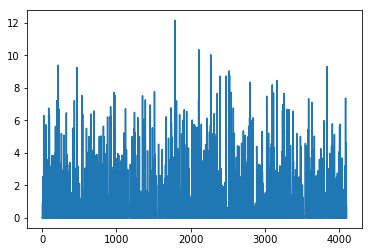

In [71]:
plt.plot(out[0])

In [53]:
model.layers[-2].output

TypeError: 'Tensor' object is not callable

In [ ]:
model.layers[-2].output